In [2]:
#Importing Necessary Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#uploading datasets

transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [8]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [9]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [10]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [11]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [12]:
# Merge datasets
transactions_products = transactions.merge(products, on="ProductID", how="left")
full_data = transactions_products.merge(customers, on="CustomerID", how="left")

In [13]:
# Data Cleaning
full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])
full_data['SignupDate'] = pd.to_datetime(full_data['SignupDate'])
full_data = full_data.rename(columns={'Price_y': 'Price'}).drop(columns=['Price_x'])

In [14]:
full_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


C:\Users\Keshav Nandane\AppData\Local\Temp\ipykernel_14548\2292145241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


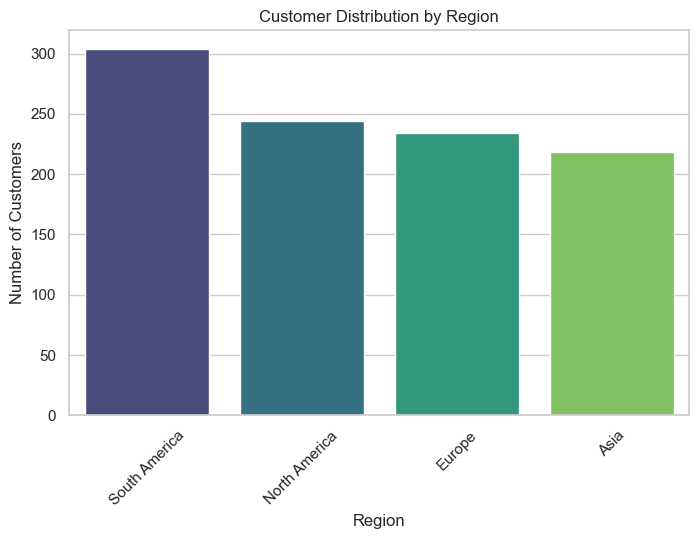

In [15]:
# 1. Customer Distribution by Region
sns.set(style="whitegrid")
region_counts = full_data["Region"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

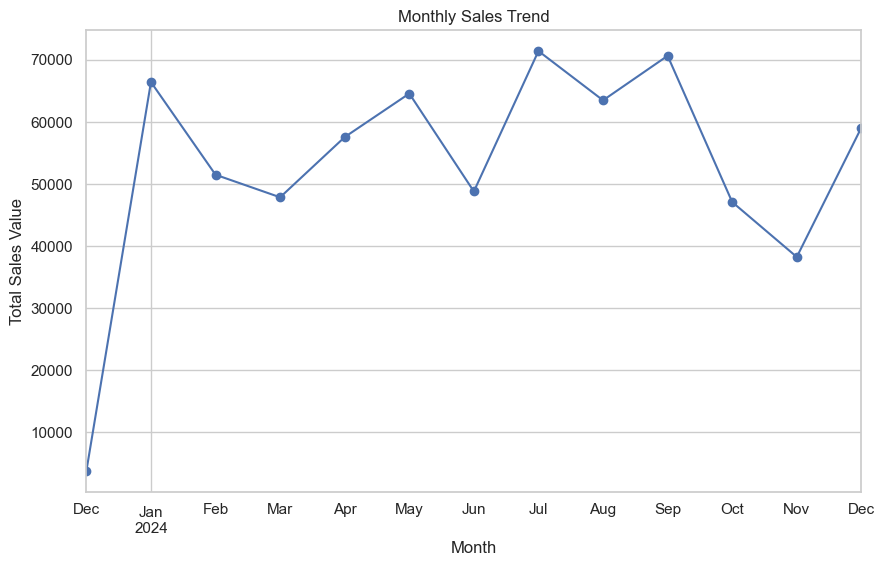

In [16]:
# 2. Sales Trends Over Time
sales_trend = full_data.groupby(full_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
sales_trend.index = sales_trend.index.to_timestamp()

plt.figure(figsize=(10, 6))
sales_trend.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales Value")
plt.xlabel("Month")
plt.grid(True)
plt.show()

C:\Users\Keshav Nandane\AppData\Local\Temp\ipykernel_14548\657857047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="coolwarm")


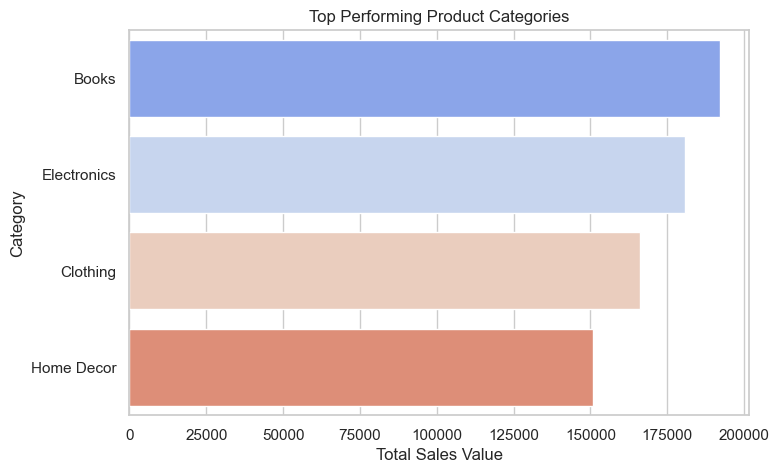

In [17]:
# 3. Top Performing Product Categories
category_sales = full_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="coolwarm")
plt.title("Top Performing Product Categories")
plt.xlabel("Total Sales Value")
plt.ylabel("Category")
plt.show()

C:\Users\Keshav Nandane\AppData\Local\Temp\ipykernel_14548\303733955.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_spend.values, y=region_avg_spend.index, palette="magma")


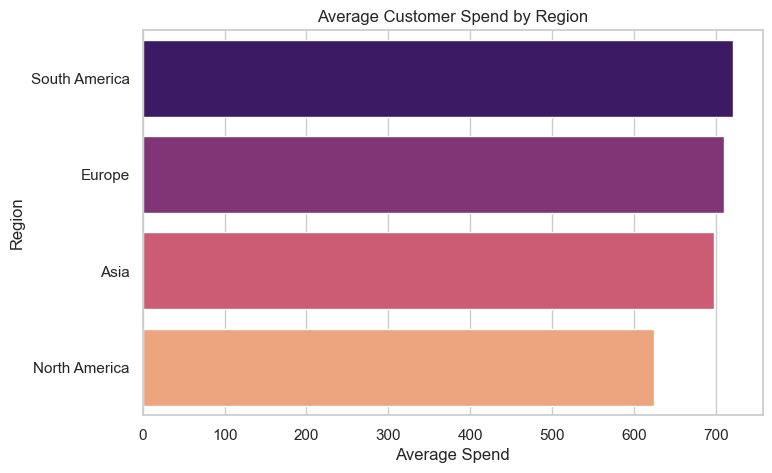

In [18]:
# 4. Average Customer Spend by Region
region_avg_spend = full_data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_avg_spend.values, y=region_avg_spend.index, palette="magma")
plt.title("Average Customer Spend by Region")
plt.xlabel("Average Spend")
plt.ylabel("Region")
plt.show()

C:\Users\Keshav Nandane\AppData\Local\Temp\ipykernel_14548\2922162669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="crest")


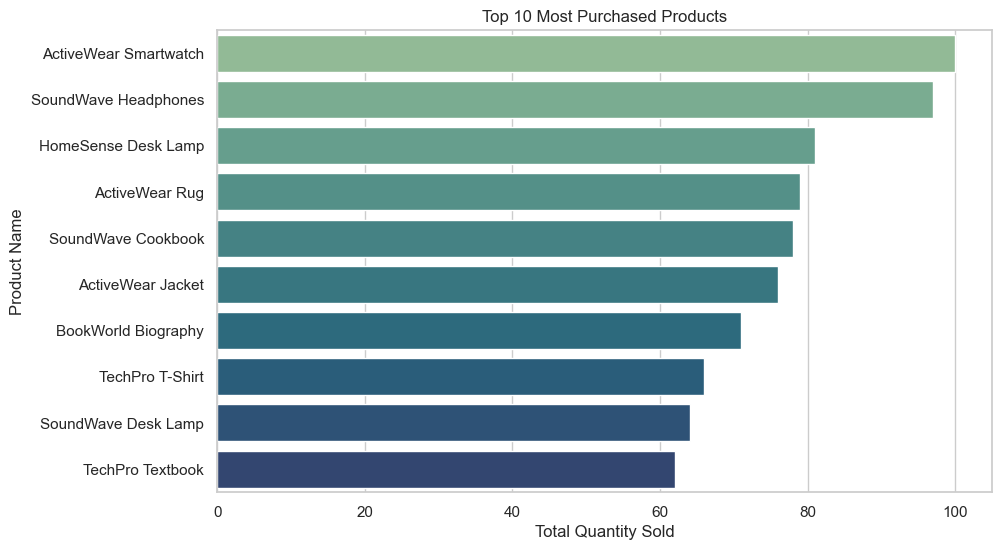

In [19]:
# 5. Most Purchased Products
top_products = full_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="crest")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()